In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
austo=pd.read_csv('F:\PGP_DSBA\project_2/austo_automobile.csv')
austo.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


# 1) DATA INFORMATION

In [6]:
austo.shape

(1581, 14)

In [7]:
austo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


# 2) PRELIMINARY DATA ANALYSIS :

          i)DUPLICATES 
          
          ii)MISSING VALUES
          
          iii)OUTLIERS

In [8]:
austo.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [9]:
austo.describe()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1581.000000,1581.000000,1475.000000,1581.000000,1581.000000
mean,31.922201,2.457938,60392.220114,20225.559322,79625.996205,35597.722960
std,8.425978,0.943483,14674.825044,19573.149277,25545.857768,13633.636545
min,22.000000,0.000000,30000.000000,0.000000,30000.000000,18000.000000
25%,25.000000,2.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,2.000000,59500.000000,25600.000000,78000.000000,31000.000000
75%,38.000000,3.000000,71800.000000,38300.000000,95900.000000,47000.000000
max,54.000000,4.000000,99300.000000,80500.000000,171000.000000,70000.000000


i ) DUPLICATES :

In [10]:
dups=austo.duplicated()
dups.sum()

0

THERE IS NO DUPLICATES PRESENT IN GIVEN DATASET

ii ) MISSING VALUES :

In [11]:
austo.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

There are 53 missing values in Gender andso replace it with Mode 

In [12]:
mode1=austo['Gender'].mode().values[0]
austo['Gender']=austo['Gender'].replace(np.nan,mode1)

 There are 106 missing values in partner_salary andso replace it with Median of partner_salary

In [13]:
median1=austo['Partner_salary'].median()
austo['Partner_salary'].replace(np.nan,median1,inplace=True)

In [14]:
austo.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

iii ) OUTLIERS :
       To detect whether outlier present in Salary , Partner_salary , Total_salary, Price

<AxesSubplot: xlabel='Salary'>

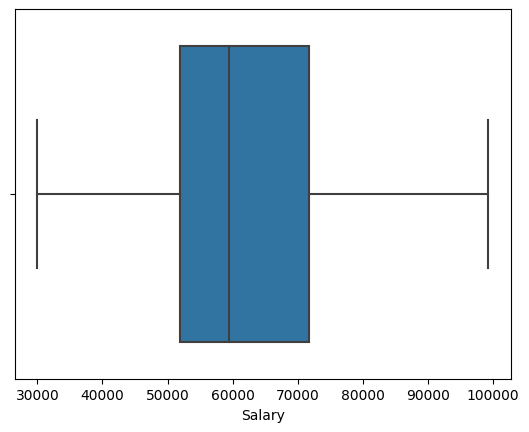

In [15]:
sns.boxplot(data=austo,x='Salary')

<AxesSubplot: xlabel='Partner_salary'>

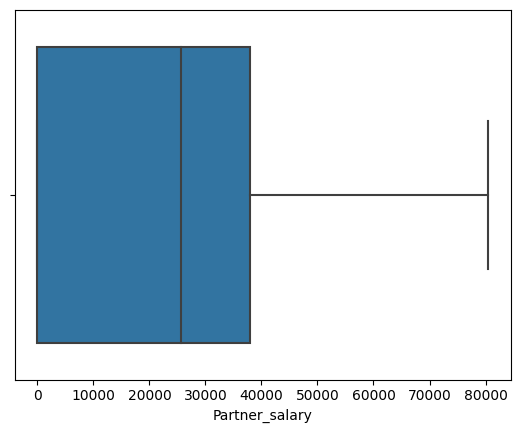

In [16]:
sns.boxplot(data=austo,x='Partner_salary')

<AxesSubplot: xlabel='Total_salary'>

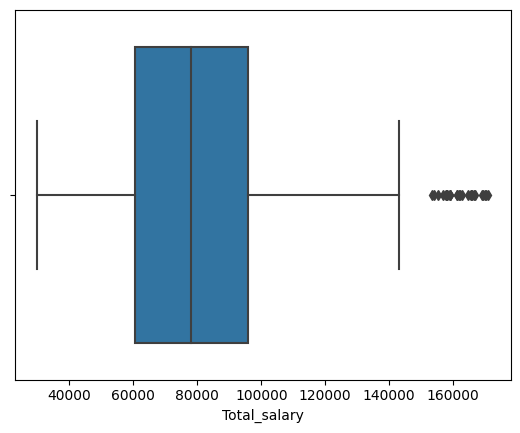

In [17]:
sns.boxplot(data=austo,x='Total_salary')

Here Total_salary has outliers, to treat it we are using BOXPLOT Method.


In [18]:
austo['Total_salary1']=austo['Total_salary']

In [19]:
austo['Total_salary1'].describe()

count      1581.000000
mean      79625.996205
std       25545.857768
min       30000.000000
25%       60500.000000
50%       78000.000000
75%       95900.000000
max      171000.000000
Name: Total_salary1, dtype: float64

<AxesSubplot: xlabel='Total_salary1'>

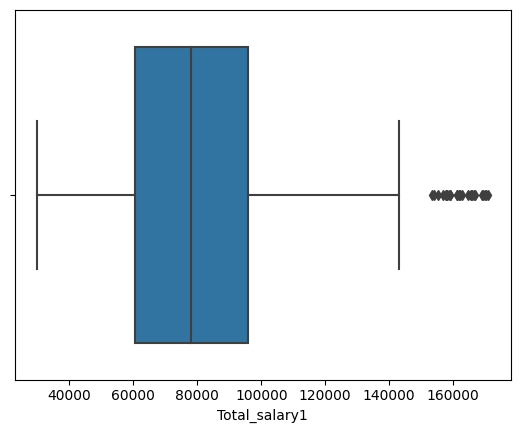

In [20]:
sns.boxplot(data=austo,x='Total_salary1')

In [21]:
def detect_outlier (col):
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range
lr,ur=detect_outlier(austo['Total_salary'])
print('lower_range',lr,'upper_range',ur)

lower_range 7400.0 upper_range 149000.0


In [22]:
austo['Total_salary1']=np.where(austo['Total_salary1']>ur,ur,austo['Total_salary1'])

In [23]:
austo['Total_salary1'].describe()

count      1581.000000
mean      79398.545225
std       24849.147996
min       30000.000000
25%       60500.000000
50%       78000.000000
75%       95900.000000
max      149000.000000
Name: Total_salary1, dtype: float64

<AxesSubplot: xlabel='Total_salary1'>

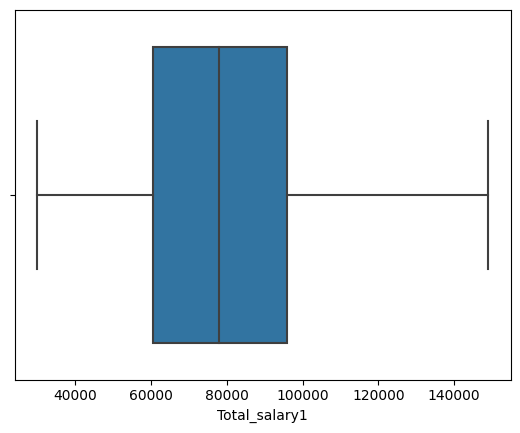

In [24]:
sns.boxplot(data=austo,x='Total_salary1')

<AxesSubplot: xlabel='Price'>

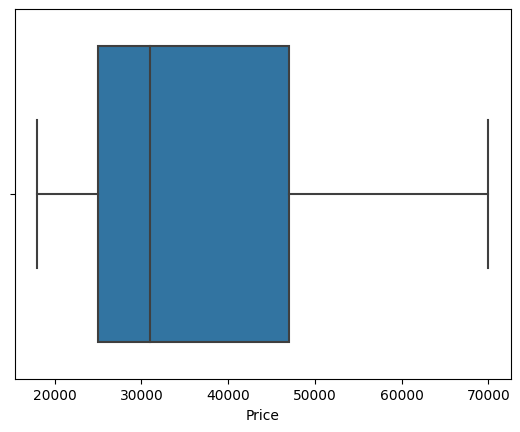

In [25]:
sns.boxplot(data=austo,x='Price')

TRANSFORMATION :
    SKEWNESS & KURTOSIS :

In [26]:
print('skewness of Total_salary is :',austo['Total_salary'].skew())

skewness of Total_salary is : 0.6097056414760922


In [27]:
print('kurtosis of Total_salary is:',austo['Total_salary'].kurtosis())

kurtosis of Total_salary is: 0.6477311703314852


Here skewness & kurtosis are between -1 to +1 so we can able to say that they are normally distributed (symmetrical).

# 3) DATA VISUALIZATION :

# i) MAXIMUM CUSTOMERS ARE UNDER WHICH AGE GROUP ?

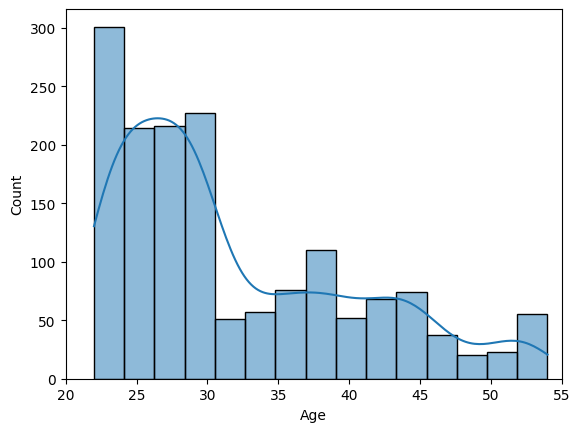

In [28]:
#Univariate Analysis
sns.histplot(x='Age',data=austo,kde=True);
plt.xlim(20,55)
plt.show()

Maximum customer lies between 20 to 30 age group.

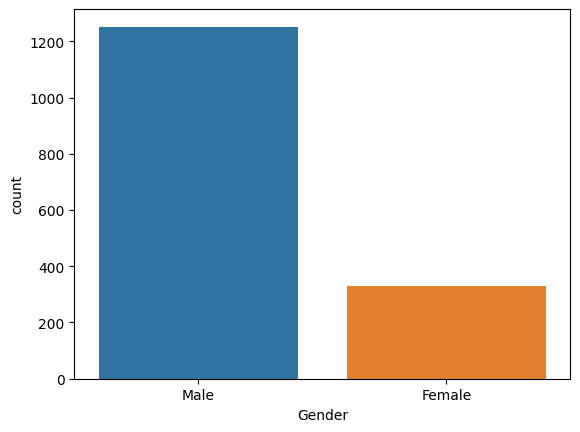

In [29]:
sns.countplot(x='Gender',data=austo);

#  ii) MAXIMUM CUSTOMERS BELONGS TO WHICH CATEGORY ?

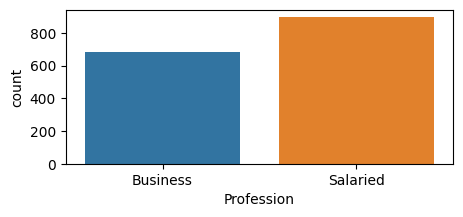

In [30]:
plt.figure(figsize=(5,2))
sns.countplot(x='Profession',data=austo);
plt.show()

685 Business and 896 salaried customers are there.So we can say that maximum customers are Salaried persons. 

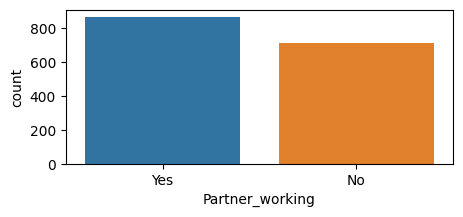

In [31]:
plt.figure(figsize=(5,2))
sns.countplot(x='Partner_working',data=austo);
plt.show()

There are 868 Partners working and 713 not working.

#  iii) WHETHER MAXIMUM CUSTOMERS BELONG TO MARRIED OR SINGLE ?

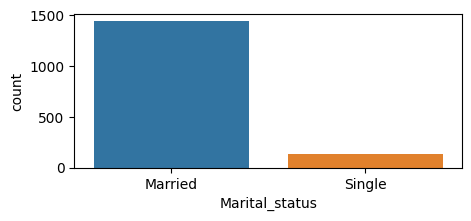

In [32]:
plt.figure(figsize=(5,2))
sns.countplot(x='Marital_status',data=austo);
plt.show()

There are 1443 Married and 138 Single customers.
    
         SO we can say that Married persons are more willing to buy cars.

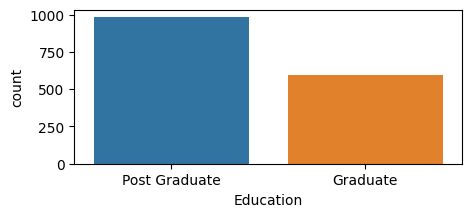

In [33]:
plt.figure(figsize=(5,2))
sns.countplot(x='Education',data=austo)
plt.show()

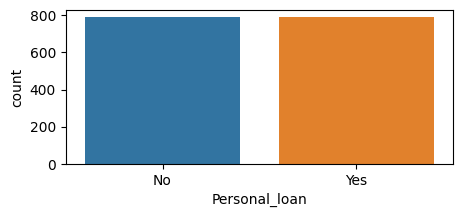

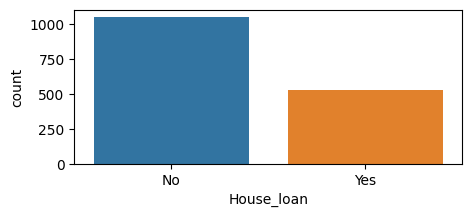

In [34]:
plt.figure(figsize=(5,2))
sns.countplot(x='Personal_loan',data=austo)
plt.show()
plt.figure(figsize=(5,2))
sns.countplot(x='House_loan',data=austo)
plt.show()

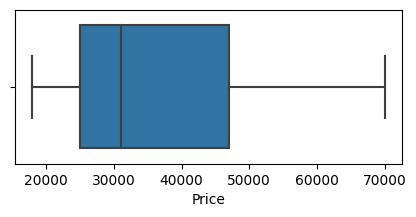

In [35]:
plt.figure(figsize=(5,2))
sns.boxplot(x='Price',data=austo)
plt.show()


# iv) WHICH CAR MODEL SOLD MOST ?

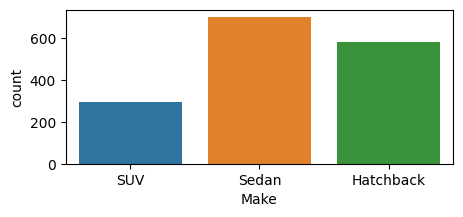

In [36]:
plt.figure(figsize=(5,2))
sns.countplot(x='Make',data=austo)
plt.show()

There are 702 Sedan and 297 SUV & 582 Hatchback models sold.So we can say that the most selling car is Sedan model.

# v) WHICH MODEL CARS ARE COSTLIER ?

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2688\3937297518.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=austo,x='Make',y='Price',ci=False);


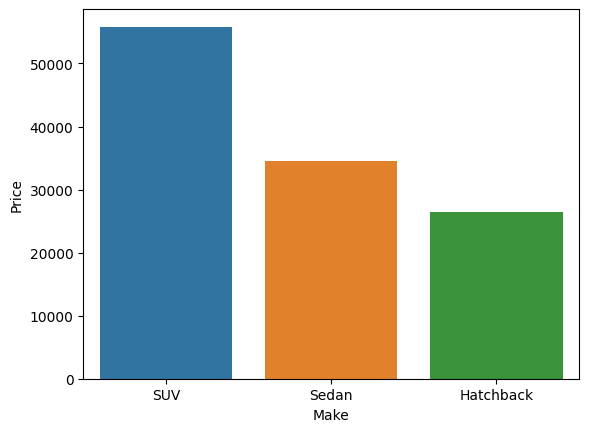

In [37]:
# Bivariate Analysis
sns.barplot(data=austo,x='Make',y='Price',ci=False);

Here we know that SUV cars are more costlier than Sedan and Hatchback cars.

From the result of above analysis , we can say that Maximum customers belongs to

            20 to 30 age group
            
            Post- Graduate and Salaried persons
            
            Married and Their Partners are working
            
            Sedan models are sold more
            

            

# 4) RELATIONSHIP AMONG VARIABLES :

RELATIONSHIP BETWEEN NUMERICAL VARIABLES :

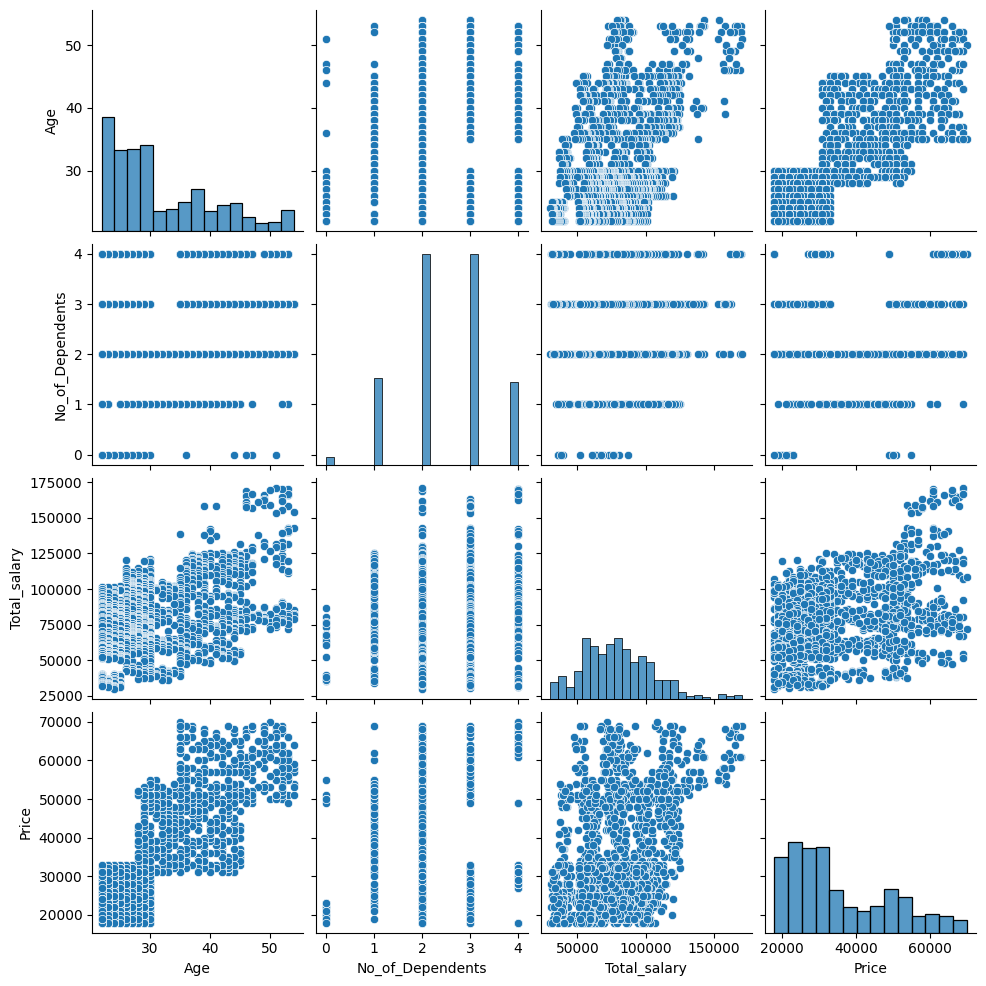

In [38]:
sns.pairplot(data=austo[['Age','No_of_Dependents','Total_salary','Price']]);

# i) HOW GENDER IMPACT CAR SALES ?

In [39]:
austo['Gender']=austo['Gender'].replace('Femal','Female')
austo['Gender']=austo['Gender'].replace('Femle','Female')

In [40]:
austo.groupby(['Make'])['Gender'].value_counts()

Make       Gender
Hatchback  Male      567
           Female     15
SUV        Female    173
           Male      124
Sedan      Male      561
           Female    141
Name: Gender, dtype: int64

<AxesSubplot: xlabel='Make', ylabel='count'>

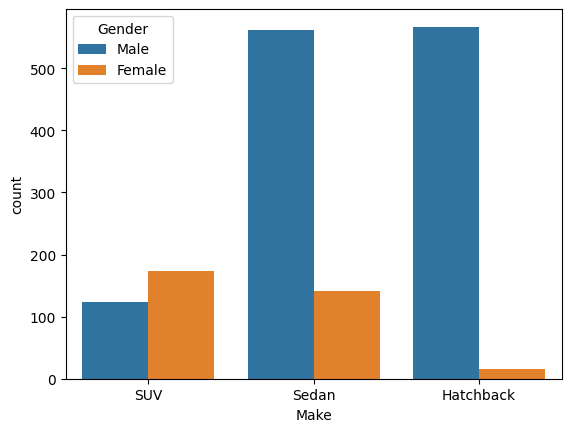

In [41]:
sns.countplot(data=austo,x='Make',hue='Gender')

Here Seden and Hatchback models are popular among MALES whereas FEMALES prefer SUV.

# ii) HOW CAN WE CATEGORIZE THE CUSTOMER? WHICH CATEGORY OF CUSTOMER INCREASES THE SALES OF CAR?

In [42]:
austo_gma=austo[['Age','Price','Make','Gender']]

Here the customer can be categorized based upon their Age (20 to 40 and 40 to 60)

In [43]:
austo_gma_2040=austo_gma[austo_gma['Age']<=40]
austo_gma_4060=austo_gma[(austo_gma['Age']>40) & (austo_gma['Age']<=60)]

In [44]:
austo_gma_2040.corr()

,Age,Price
Age,1.000000,0.711258
Price,0.711258,1.000000


In [45]:
austo_gma_4060.corr()

,Age,Price
Age,1.000000,0.496478
Price,0.496478,1.000000


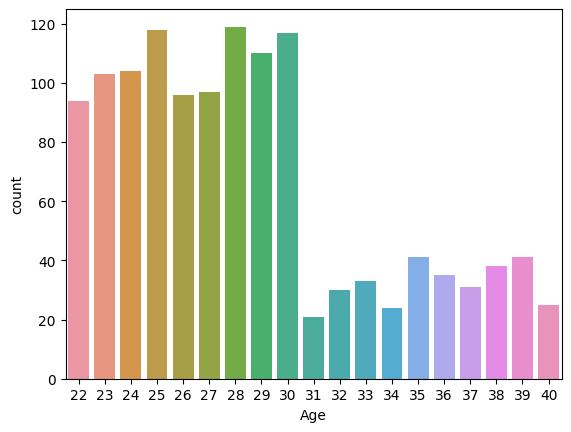

In [46]:
sns.countplot(x='Age',data=austo_gma_2040);

 Maximum customers are between 20 to 30 age groups.

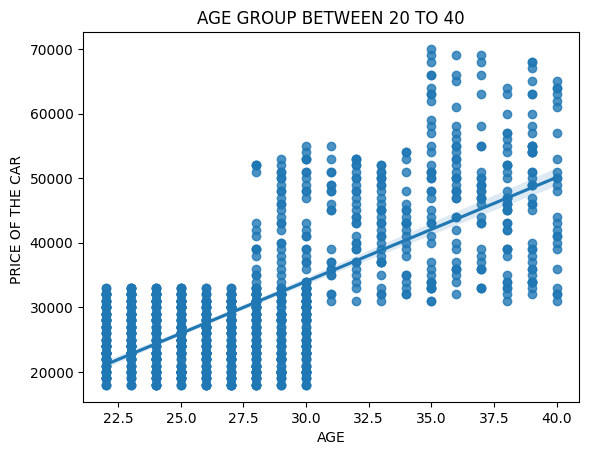

In [47]:
sns.regplot(y='Price',data=austo_gma_2040,x='Age');
plt.xlabel('AGE')
plt.ylabel('PRICE OF THE CAR ')
plt.title('AGE GROUP BETWEEN 20 TO 40')
plt.show()

In [48]:
austo_gma_2040['Price'].sum()

40419000

There are 1277 customers are between 20 to 40 age group.

    Their total spending is Rs.4,04,19,000  
    Average spending per car is 31,652.

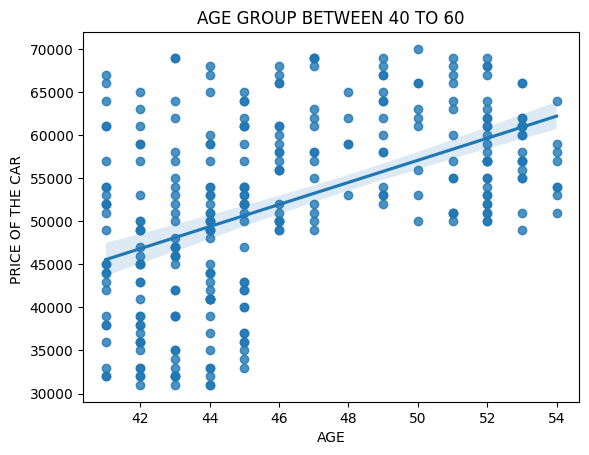

In [49]:
sns.regplot(y='Price',data=austo_gma_4060,x='Age');
plt.xlabel('AGE')
plt.ylabel('PRICE OF THE CAR ')
plt.title('AGE GROUP BETWEEN 40 TO 60')
plt.show()

In [50]:
austo_gma_4060.describe()

,Age,Price
count,304.000000,304.000000
mean,46.177632,52174.342105
std,3.990255,10299.758059
min,41.000000,31000.000000
25%,43.000000,45000.000000
50%,45.000000,53000.000000
75%,50.000000,60250.000000
max,54.000000,70000.000000


In [51]:
austo_gma_4060['Price'].sum()

15861000

There are 304 customers between 40 to 60 age group.

    Total spending is Rs.1,58,61,000. 
    Average spending is 52174

# iii) WHICH CAR MODEL SHOULD BE PREFFERED BY MALE & FEMALE AMONG 20 TO 40 AGE GROUPS?

In [52]:
austo_gma_2040.groupby(['Gender'])['Make'].value_counts()

Gender  Make     
Female  Sedan        100
        SUV           63
        Hatchback     15
Male    Hatchback    567
        Sedan        499
        SUV           33
Name: Make, dtype: int64

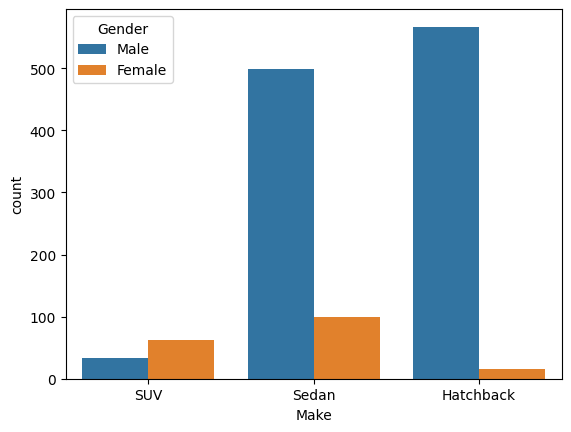

In [53]:
sns.countplot(x='Make',data=austo_gma_2040,hue='Gender');

There are 178 females between 20 to 40 age groups.

    They prefer Sedan model cars.
    
There are 1099 Males between 20 to 40 age groups.

    They prefer Hatchback model cars


# vi) WHICH CAR MODEL SHOULD BE PREFFERED BY MALE & FEMALE AMONG 40 TO 60 AGE GROUPS?

In [54]:
austo_gma_4060.groupby(['Gender'])['Make'].value_counts()

Gender  Make 
Female  SUV      110
        Sedan     41
Male    SUV       91
        Sedan     62
Name: Make, dtype: int64

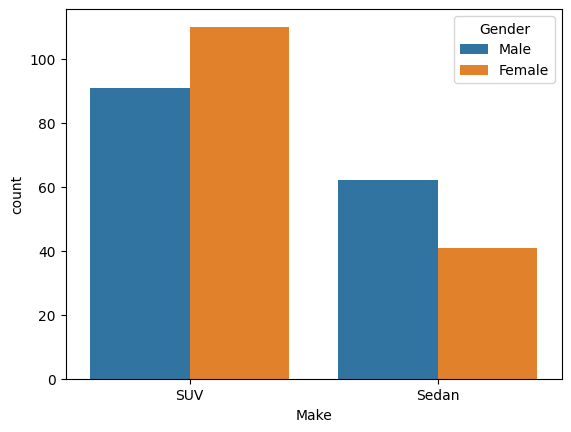

In [55]:
sns.countplot(x='Make',data=austo_gma_4060,hue='Gender');

There are 151 females between 40 to 60 age groups.

    They prefer SUV model cars.
    
There are 153 Males between 40 to 60 age groups.

    They prefer SUV model cars


As we concluded that 

                     Aged people prefer SUV model which is costlier than others.
    
                     Younger people prefer Sedan and Hatchback models which is less costlier than others

# v) HOW TOTAL SALARY OF THE CUSTOMER IMPACT THE SALES OF CAR MODELS ?

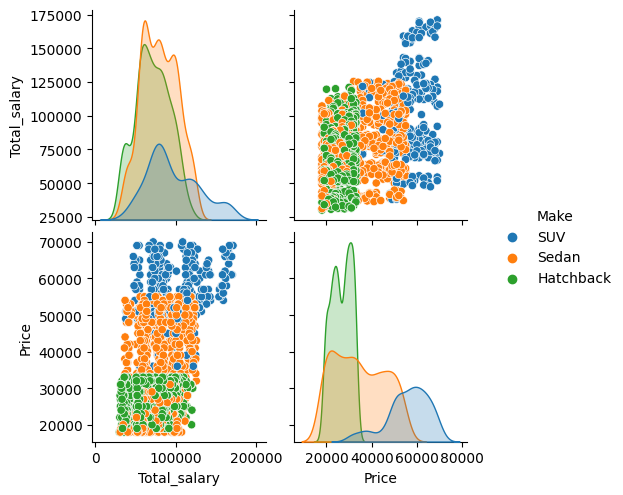

In [56]:
sns.pairplot(data=austo,vars=['Total_salary','Price'],hue='Make');

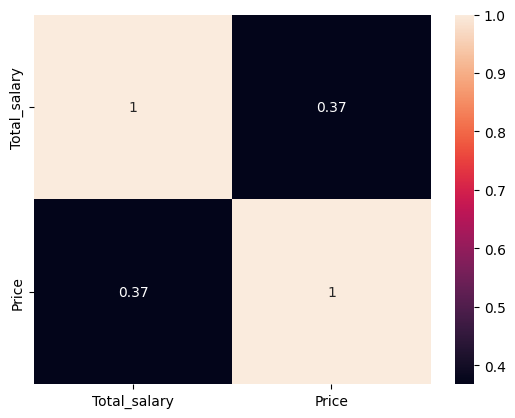

In [57]:
sns.heatmap(data=austo[['Total_salary','Price']].corr(),annot=True);

<AxesSubplot: xlabel='Make', ylabel='Total_salary'>

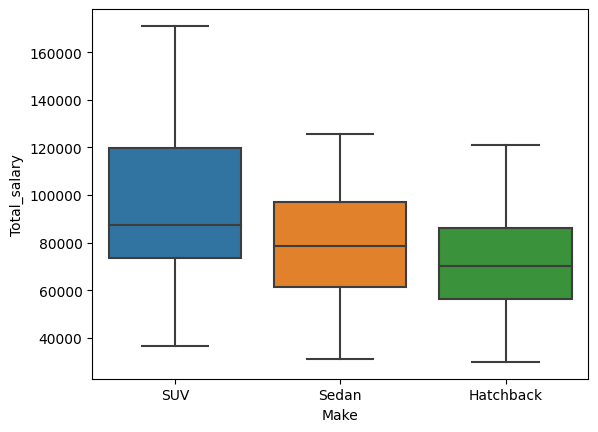

In [58]:
sns.boxplot(x='Make',y='Total_salary',data=austo)

Here we concluded that there is a positive correlation between Total_salary and Price of the car. 
   
       Hence if Total_salary is high, the customer could prefer costly car like SUV.

# vi) DOES MARITAL STATUS AFFECT THE SALES OF CAR ? MARRIED PERSON PREFER WHICH MODELLED CARS? 

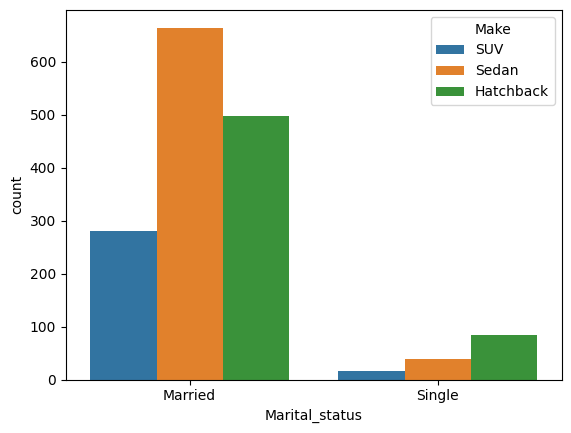

In [59]:
sns.countplot(x='Marital_status',hue='Make',data=austo);

In [60]:
austo.groupby(['Marital_status'])['Make'].value_counts()

Marital_status  Make     
Married         Sedan        664
                Hatchback    498
                SUV          281
Single          Hatchback     84
                Sedan         38
                SUV           16
Name: Make, dtype: int64

Here Maximum customers(1443) are Married and they prefer Sedan modelled cars.
    
    There are 138 single marital_status customer and they prefer Hatchback cars. 

# Vii) DOES CUSTOMER HAVING WORKING PARTNER IMPACT SALES OF CAR ?

In [61]:
austo['Partner_working'].value_counts()

Yes    868
No     713
Name: Partner_working, dtype: int64

In [62]:
austo.groupby(['Partner_working'])['Make'].value_counts()

Partner_working  Make     
No               Sedan        288
                 Hatchback    281
                 SUV          144
Yes              Sedan        414
                 Hatchback    301
                 SUV          153
Name: Make, dtype: int64

Here we know that customer having working partner prefer Sedan car models.

# viii ) DOES A PERSON'S LOAN AFFECT CAR SALES ?

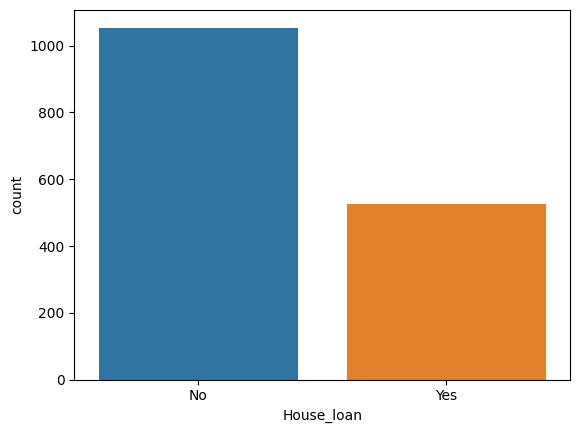

In [63]:
sns.countplot(x='House_loan',data=austo);

In [64]:
austo['Personal_loan'].value_counts()

Yes    792
No     789
Name: Personal_loan, dtype: int64

In [65]:
austo['House_loan'].value_counts()

No     1054
Yes     527
Name: House_loan, dtype: int64

In [66]:
austo.groupby(['House_loan','Personal_loan'])['Make'].value_counts()

House_loan  Personal_loan  Make     
No          No             Sedan        198
                           Hatchback    172
                           SUV          170
            Yes            Sedan        234
                           Hatchback    175
                           SUV          105
Yes         No             Hatchback    119
                           Sedan        119
                           SUV           11
            Yes            Sedan        151
                           Hatchback    116
                           SUV           11
Name: Make, dtype: int64

 Here we know that if customer having both Housing loan and personal loan (278 customers) ,they prefer Sedan cars.
    
        if they have only Personal loan (514), they also prefer sedan cars.
        
        if they have only House loan (249), they prefer both Sedan & Hatchback cars.
        
        if they dont have any of the loan (540) , they prefer Sedan cars.
        
        so we say that a person without housing loan and personal loan are willing to buy cars and if a person having 
        housing loan , they are less willing to buy cars

# xi) HOW NUMBER OF DEPENDENTS AFFECT PURCHASING CAPACITY OF CUSTOMER ?

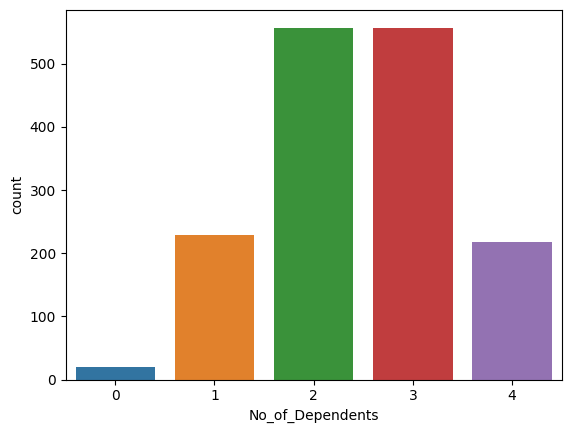

In [67]:
sns.countplot(x='No_of_Dependents',data=austo);

<AxesSubplot: xlabel='No_of_Dependents', ylabel='count'>

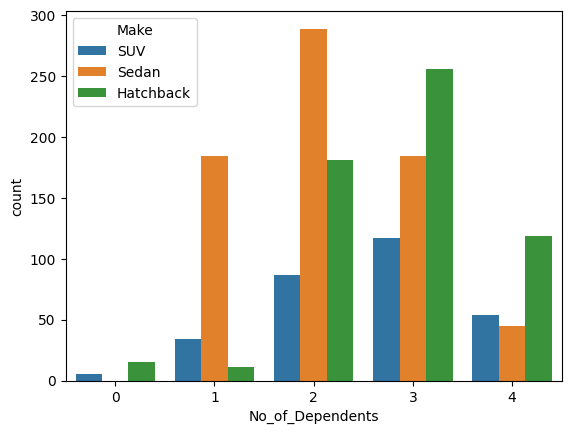

In [68]:
sns.countplot(x='No_of_Dependents',hue='Make',data=austo)

If no. of dependent is greater than 2 , they prefer low cost Hatchback cars

# x) TOTAL NUMBER OF CARS SOLD UNDER EACH MODEL AND THEIR AVERAGE PRICE RANGE TO KNOW WHICH CAR IS CHEAP OR COSTLY)?

<AxesSubplot: xlabel='Marital_status', ylabel='Price'>

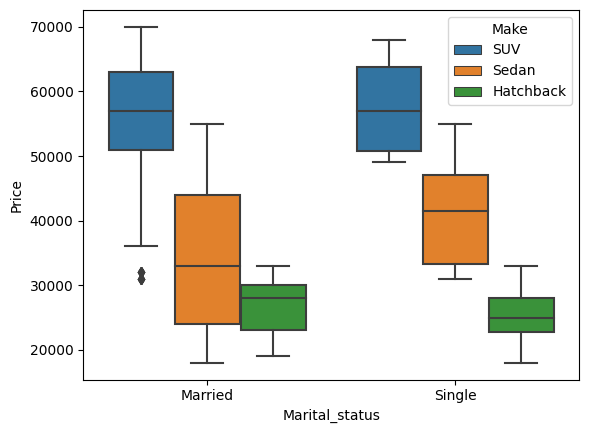

In [69]:
sns.boxplot(x='Marital_status',y='Price',hue='Make',data=austo)

In [70]:
austo.groupby(['Make'])['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Hatchback,582.0,26474.226804,4290.467640,18000.0,23000.0,27000.0,30000.0,33000.0
SUV,297.0,55824.915825,9218.242714,31000.0,51000.0,57000.0,63000.0,70000.0
Sedan,702.0,34603.988604,11152.164304,18000.0,24000.0,33000.0,44000.0,55000.0


  702 Sedan cars sold and their avg price range was Rs.34604
  
  582 Hatchbackcars sold and their avg price range was Rs.26474
  
  297 SUV cars sold and their avg price range was Rs.55825
  
          So we conclude that Sedan cars sold more 
          
                               SUV cars are the costliest one.
  

   ANALYSIS :
  
        1) Across all Age groups , Males prefer both Sedan and Hatchback cars & Females prefer SUV cars.
          
        2) Maximum (1277) customers are between 20 to 40 age group. Among them, Males prefer Hatchback cars & 
        
           Females prefer Sedan cars

                          Total spending is Rs.4,04,19,000 
                          
                          Average spending per car is 31,652.
                          
           304 customers between 40 to 60 age group. Among them , Males & Females prefer SUV cars.

                           Total spending is Rs.1,58,61,000.
                           
                           Average spending is 52174   
                          
            Aged people prefer SUV model which is costlier than others.
    
            Younger people prefer Sedan and Hatchback models which is less costlier than SUV.
            
         3) If Total_salary is high, the customer could prefer costly car like SUV. (positive correlation)
         
         4) Maximum customers(1443) are Married and prefer Sedan cars.
    
            138 single marital_status customers are there & prefer Hatchback cars. 
            
         5)  Customers having working partner prefer Sedan cars. 
         
         6)  Person without housing loan and personal loan are willing to buy cars and if a person having 
         
             housing loan , they are less willing to buy cars.
             
         7)  If no. of dependent is greater than 2 , they prefer low cost Hatchback cars.
         
         8)  Sedan cars are sold more & SUV cars are the costliest one.

# 5) E1) Steve Roger says “Men prefer SUV by a large margin, compared to the women” ? 

In [71]:
austo.groupby(['Gender'])['Make'].value_counts()

Gender  Make     
Female  SUV          173
        Sedan        141
        Hatchback     15
Male    Hatchback    567
        Sedan        561
        SUV          124
Name: Make, dtype: int64

NO , because Females prefer SUV than Males.
            
            173 Females prefer suv
            124 Males prefer SUV

#  E2)  Ned Stark believes that a salaried person is more likely to buy a Sedan ?      

In [72]:
austo.groupby(['Profession'])['Make'].value_counts()

Profession  Make     
Business    Sedan        306
            Hatchback    290
            SUV           89
Salaried    Sedan        396
            Hatchback    292
            SUV          208
Name: Make, dtype: int64

 YES ,because 396 salaried persons prefer Sedan than 306 Business persons who prefer sedan.

# E3) Sheldon Cooper does not believe any of them; he claims that a salaried male is an easier target for a SUV sale over a Sedan Sale ?

In [73]:
austo.groupby(['Profession','Gender'])['Make'].value_counts()

Profession  Gender  Make     
Business    Female  SUV           55
                    Sedan         50
            Male    Hatchback    290
                    Sedan        256
                    SUV           34
Salaried    Female  SUV          118
                    Sedan         91
                    Hatchback     15
            Male    Sedan        305
                    Hatchback    277
                    SUV           90
Name: Make, dtype: int64

NO , here we can say that only 90 Salaried males prefer SUV but 305 salaried Males prefer sedan.So Salaried male is an easier target for Sedan sale.

# From the given data, comment on the amount spent on purchasing automobiles across the following categories. Comment on how a Business can utilize the results from this exercise. Give justification along with presenting metrics/charts used for arriving at the conclusions.
F1) Gender 

In [74]:
austo.groupby(['Gender'])['Price'].sum()

Gender
Female    15695000
Male      40585000
Name: Price, dtype: int64

In [75]:
austo.groupby(['Gender'])['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,329.0,47705.167173,11244.836378,20000.0,38000.0,49000.0,55000.0,69000.0
Male,1252.0,32416.134185,12366.253107,18000.0,23000.0,29000.0,37000.0,70000.0


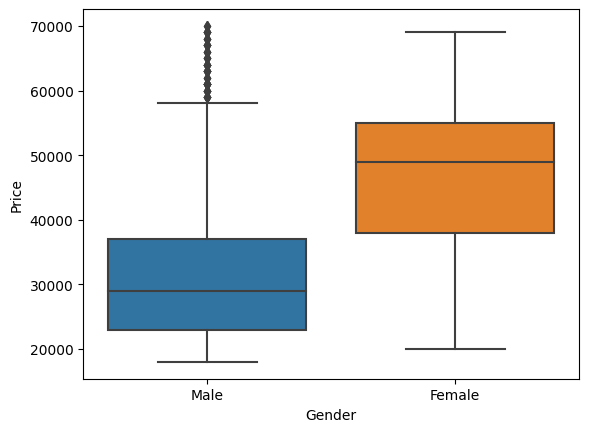

In [76]:
sns.boxplot(y='Price',x='Gender',data=austo);

From the above results , we can say that Females spent Rs. 1,56,95,000 (1.56 Cr approx) whereas Males spent Rs.4,05,85,000 (4.05 Cr approx).This is because there are less number of Females (Females - 329 &  Males - 1252 ) .

 But the AVERAGE spending of Female is higher than Average spending of Males.
    
        FEMALE - Rs.47,705 
        
         Males - Rs.32,416

SO for increasing Sales and Revenue , we have to focus more on FEMALES through effective Campaign.

F2) Personal loan

In [77]:
austo.groupby(['Personal_loan'])['Price'].sum()

Personal_loan
No     28990000
Yes    27290000
Name: Price, dtype: int64

In [78]:
austo.groupby(['Personal_loan'])['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Personal_loan,,,,,,,,
No,789.0,36742.712294,14534.344526,18000.0,25000.0,32000.0,49000.0,70000.0
Yes,792.0,34457.070707,12578.780338,18000.0,24000.0,31000.0,45000.0,70000.0


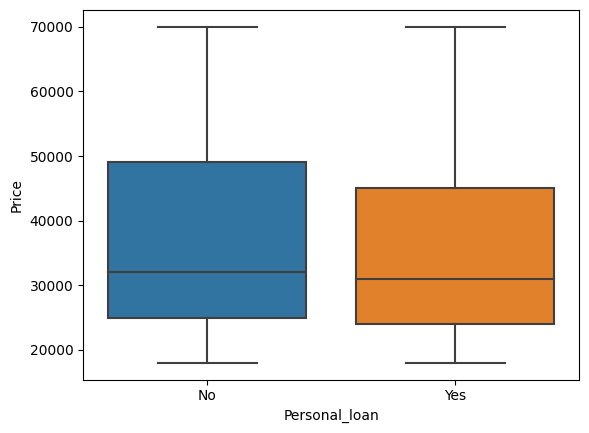

In [79]:
sns.boxplot(y='Price',x='Personal_loan',data=austo);

There are 789 customers without personal loan.

                They spent Rs. 2,89,90,000 (2.89 cr approx) and
    
                Their average spending is Rs.36742.

There are 792 customers with personal loan .

                They spent Rs. 2,72,90,000 (2.72 cr approx) and 
                
                Their average spending is Rs.34457.


    
    

     so we conclude that customers without personal loan have more purchasing capacity than others. Hence we have to focus 
     more on those persons to increase Sales through effective campaign.

# From the current data set comment if having a working partner leads to the purchase of a higher-priced car.

In [80]:
austo.groupby(['Partner_working'])['Make'].value_counts()

Partner_working  Make     
No               Sedan        288
                 Hatchback    281
                 SUV          144
Yes              Sedan        414
                 Hatchback    301
                 SUV          153
Name: Make, dtype: int64

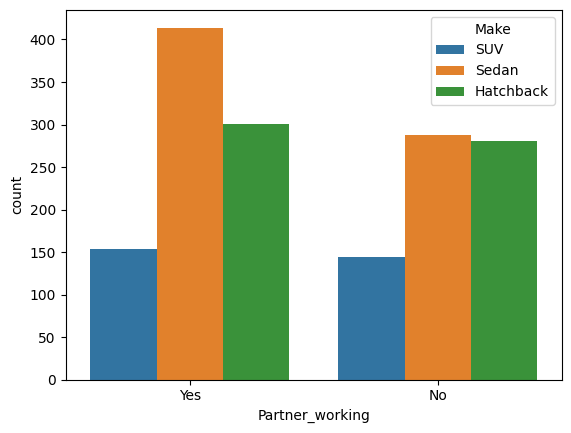

In [81]:
sns.countplot(x='Partner_working',hue='Make',data=austo);

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2688\4270575798.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=austo,x='Make',y='Price',ci=False);


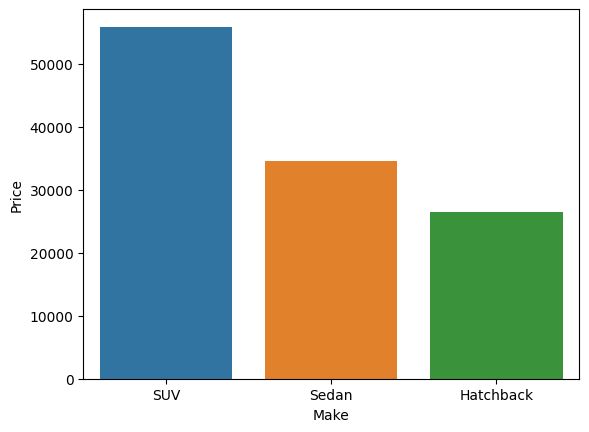

In [82]:
sns.barplot(data=austo,x='Make',y='Price',ci=False);

SUV cars are more costlier than Sedan and Hatchback.
            
      costlier :  SUV > SEDAN > HATCHBACK 
      
      So we can say that having a working partner does not lead to purchase of higher priced SUV car. Most of them prefers
      
      only SEDAN cars which is less costlier than SUV.

# The main objective of this analysis is to devise an improved marketing strategy to send targeted information to different groups of potential buyers present in the data. For the current analysis use Gender and Marital_status - fields to arrive at groups with similar purchase history.

In [83]:
austo.groupby(['Gender','Marital_status'])['Make'].value_counts()

Gender  Marital_status  Make     
Female  Married         SUV          166
                        Sedan        127
                        Hatchback     14
        Single          Sedan         14
                        SUV            7
                        Hatchback      1
Male    Married         Sedan        537
                        Hatchback    484
                        SUV          115
        Single          Hatchback     83
                        Sedan         24
                        SUV            9
Name: Make, dtype: int64

As per the above analysis , Female customers are very low (only 329 out of 1581 customers ) particularly single Females 

so we have to increase marketing campaign among them. Increase SUV marketing campaign among both married and single MALES and 

also among single Females.
    
    

# Framing An Analytics Problem
Analyse the dataset and list down the top 5 important variables, along with the business justifications.

# 1) AGE :

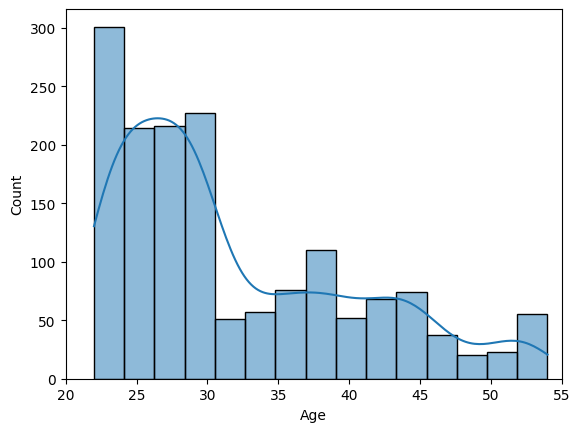

In [84]:
#Univariate Analysis
sns.histplot(x='Age',data=austo,kde=True);
plt.xlim(20,55)
plt.show()

Across all Age groups , Males prefer both Sedan and Hatchback cars & Females prefer SUV cars.

        Maximum (1277) customers are between 20 to 40 age group. Among them, Males prefer Hatchback cars & 

          Females prefer Sedan cars

       304 customers between 40 to 60 age group. Among them , Males & Females prefer SUV cars.

       Aged people prefer SUV model which is costlier than others.

       Younger people prefer Sedan and Hatchback models which is less costlier than SUV.
       
       
   So we have to improve maketing campaign among 40 TO 60 AGE GROUPS  because they are very less in number
   
   (only 304 out of 1581) whose average spent was high.
   
   

# 2) GENDER :

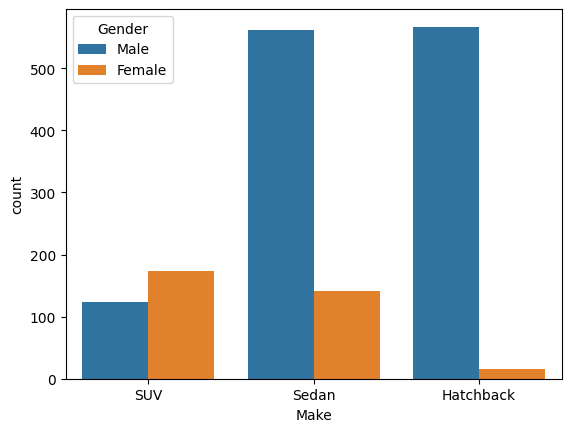

In [85]:
sns.countplot(data=austo,x='Make',hue='Gender');

  FEMALE customers are very low (329 out of 1581).SO improve Marketing campaign among them to increase sales.

# 3) MARITAL_STATUS :

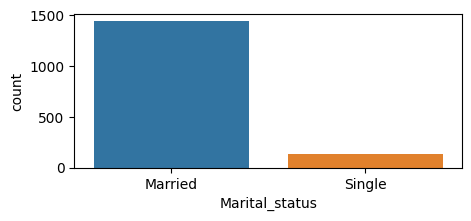

In [86]:
plt.figure(figsize=(5,2))
sns.countplot(x='Marital_status',data=austo);
plt.show()

        Maximum customers(1443) are Married and prefer Sedan cars.

        138 single marital_status customers are there & prefer Hatchback cars. 
        
        We have to improve marketing campaign among SINGLE MARITAL_STATUS customer to enhance the sales.

# 4) MODEL AND PRICE OF THE CAR :

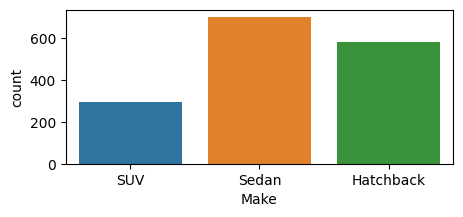

In [87]:
plt.figure(figsize=(5,2))
sns.countplot(x='Make',data=austo)
plt.show()

Only (297 out of 1581) SUV cars are sold.Effective campaign has to be provided for increasing the sales of SUV CARS which yield high revenue.

    costlier : SUV > SEDAN > HATCHBACK

# 5) TOTAL _SALARY :

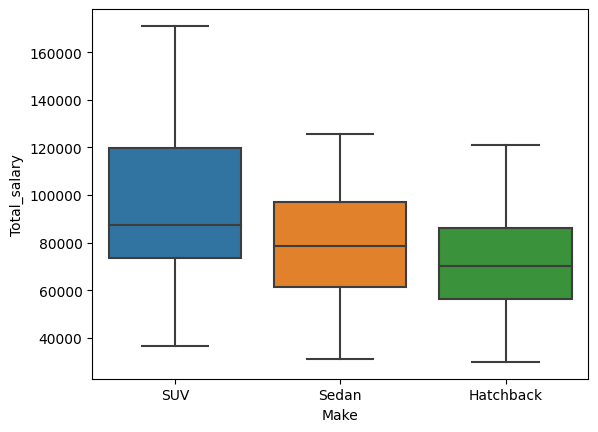

In [88]:
sns.boxplot(x='Make',y='Total_salary',data=austo);

HIGHER SALARIED (TOTAL_SALARY) person prefer SUV so Marketing campaign for SUV has to be improved among them.

# 6) LOAN :

In [89]:
austo.groupby(['House_loan','Personal_loan'])['Make'].value_counts()

House_loan  Personal_loan  Make     
No          No             Sedan        198
                           Hatchback    172
                           SUV          170
            Yes            Sedan        234
                           Hatchback    175
                           SUV          105
Yes         No             Hatchback    119
                           Sedan        119
                           SUV           11
            Yes            Sedan        151
                           Hatchback    116
                           SUV           11
Name: Make, dtype: int64

   PERSON WITHOUT PERSONAL LOAN AND HOUSING LOAN (only 540 out of 1581) , have more purchasing capacity. So effective campaign should be provided among them to increase the sales.

# GODIGT BANK

# Case 2 : GODIGT BANK

In [90]:
godigt=pd.read_excel('F:\PGP_DSBA\project_2\godigt_cc_data.xlsx')
godigt

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,2019-09-29,B,0,1,1,...,27,0,0,0,0,0,T,27729,Self Employed,290000
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,2002-10-30,A,1,1,1,...,52,0,0,0,0,0,R,280854,0,950000
2,3,4377 48XX XXXX XXXX,437748,Visa,rewards,2013-10-05,C,0,0,0,...,23,1,0,0,0,0,R,70587,Student,210000
3,4,4258 06XX XXXX XXXX,425806,Visa,indianoil,1999-06-01,E,0,1,1,...,49,0,0,1,0,0,T,9156,Self Employed,80000
4,5,4377 48XX XXXX XXXX,437748,Visa,edge,2006-06-13,B,1,1,1,...,21,1,0,0,0,0,T,38108,Salaried,220000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8443,8444,4262 41XX XXXX XXXX,426241,Visa,chartered,2010-01-10,A,1,1,1,...,47,0,0,0,0,0,T,108713,0,970000
8444,8445,37691 6XXXX XXXXX,376916,Amex,centurion,2006-07-19,A,0,1,1,...,52,0,0,0,0,0,T,42369,Salaried,200000
8445,8446,4375 51XX XXXX XXXX,437551,Visa,rewards,2006-02-15,D,0,1,1,...,36,0,0,0,0,0,T,8459,Retired,90000
8446,8447,4477 47XX XXXX XXXX,447747,Visa,indianoil,2003-11-06,C,0,0,0,...,54,1,0,0,0,0,T,57100,Salaried,210000


# DATA INFORMATION

In [91]:
godigt.shape

(8448, 28)

In [92]:
godigt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

# PRELIMINARY DATA ANAYSIS

In [93]:
godigt.describe()

,userid,card_bin_no,active_30,active_60,active_90,cc_active30,cc_active60,cc_active90,widget_products,engagement_products,annual_income_at_source,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,avg_spends_l3m,cc_limit
count,8448.00000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8.448000e+03,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000
mean,4224.50000,436747.044508,0.292377,0.494792,0.642045,0.284091,0.484493,0.632339,3.614583,3.991596,1.674595e+06,33.164181,0.111269,0.047940,0.080374,0.008878,0.009470,49527.365530,251706.912879
std,2438.87187,30489.752417,0.454881,0.500002,0.479427,0.451007,0.499789,0.482197,2.273193,2.572045,1.064307e+06,15.868344,0.314483,0.213653,0.271888,0.093809,0.096856,46244.954836,229114.856385
min,1.00000,376916.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000950e+05,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2112.75000,426241.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.061104e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17110.000000,90000.000000
50%,4224.50000,437551.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,4.000000,4.000000,1.372134e+06,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37943.000000,150000.000000
75%,6336.25000,438439.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,6.000000,1.881734e+06,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66095.750000,350000.000000
max,8448.00000,524178.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,8.000000,4.999508e+06,60.000000,1.000000,1.000000,1.000000,1.000000,1.000000,289292.000000,990000.000000


# i) TO DETECT DUPLICATES :

In [94]:
dups=godigt.duplicated()
dups.sum()

0

# ii ) MISSING VALUES :

In [95]:
godigt.isnull().sum()

userid                      0
card_no                     0
card_bin_no                 0
Issuer                      0
card_type                   0
card_source_date            0
high_networth               0
active_30                   0
active_60                   0
active_90                   0
cc_active30                 0
cc_active60                 0
cc_active90                 0
hotlist_flag                0
widget_products             0
engagement_products         0
annual_income_at_source     0
other_bank_cc_holding       0
bank_vintage                0
T+1_month_activity          0
T+2_month_activity          0
T+3_month_activity          0
T+6_month_activity          0
T+12_month_activity         0
Transactor_revolver        38
avg_spends_l3m              0
Occupation_at_source        0
cc_limit                    0
dtype: int64

There are 38 missing values in Transactor_revolver.For all the missing Transactor_revolver rows , Hotlist flag is Y which means their credit cards are blocked by bank due to some risk factors such as stolen,lost,cancel etc and for those cards there should be no average spending also. So it is better to drop all the missing rows in Transactor_revolver to get desired results.

In [96]:
godigt.dropna(subset=['Transactor_revolver'],inplace=True)
godigt

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,2019-09-29,B,0,1,1,...,27,0,0,0,0,0,T,27729,Self Employed,290000
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,2002-10-30,A,1,1,1,...,52,0,0,0,0,0,R,280854,0,950000
2,3,4377 48XX XXXX XXXX,437748,Visa,rewards,2013-10-05,C,0,0,0,...,23,1,0,0,0,0,R,70587,Student,210000
3,4,4258 06XX XXXX XXXX,425806,Visa,indianoil,1999-06-01,E,0,1,1,...,49,0,0,1,0,0,T,9156,Self Employed,80000
4,5,4377 48XX XXXX XXXX,437748,Visa,edge,2006-06-13,B,1,1,1,...,21,1,0,0,0,0,T,38108,Salaried,220000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8443,8444,4262 41XX XXXX XXXX,426241,Visa,chartered,2010-01-10,A,1,1,1,...,47,0,0,0,0,0,T,108713,0,970000
8444,8445,37691 6XXXX XXXXX,376916,Amex,centurion,2006-07-19,A,0,1,1,...,52,0,0,0,0,0,T,42369,Salaried,200000
8445,8446,4375 51XX XXXX XXXX,437551,Visa,rewards,2006-02-15,D,0,1,1,...,36,0,0,0,0,0,T,8459,Retired,90000
8446,8447,4477 47XX XXXX XXXX,447747,Visa,indianoil,2003-11-06,C,0,0,0,...,54,1,0,0,0,0,T,57100,Salaried,210000


After dropping missing values , we can get 8410 records of customers.

TO TREAT THE 0'S PRESENT IN OCCUPATION AT SOURCE COLUMN :

In [97]:
godigt['Occupation_at_source'].value_counts()

Salaried         3908
Self Employed    2170
Retired          1067
Student           621
Housewife         384
0                 260
Name: Occupation_at_source, dtype: int64

<AxesSubplot: xlabel='Occupation_at_source', ylabel='count'>

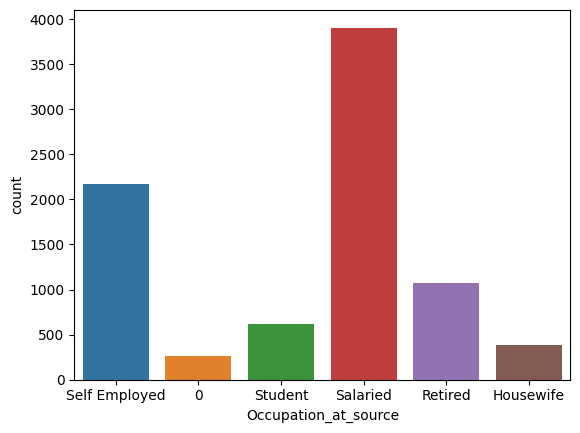

In [98]:
sns.countplot(data=godigt,x='Occupation_at_source')

Here we have to replace '0' in occupation_at_source column using MODE because it is a categorical variable to get the completeness.

In [99]:
mode2=godigt['Occupation_at_source'].mode().values[0]
mode2

'Salaried'

In [100]:
godigt['Occupation_at_source']=godigt['Occupation_at_source'].replace(0,mode2)
godigt['Occupation_at_source'].value_counts()

Salaried         4168
Self Employed    2170
Retired          1067
Student           621
Housewife         384
Name: Occupation_at_source, dtype: int64

Before treating ,the maximum number of customers would be salaried ( 3908 out of 8410 ). The number of  0's would be 260 . Now the total salaried person is 4168.

# iii) OUTLIERS :
    

i) annual_income_at_source :

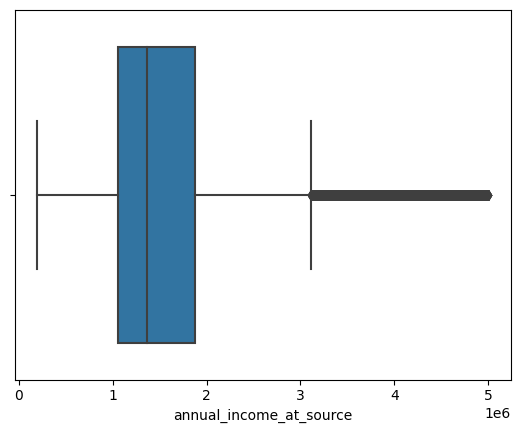

In [101]:
sns.boxplot(data=godigt,x='annual_income_at_source');

There are outliers present in annual_income_at_source column so to treat it we have to use BOXPLOT.

In [102]:
def detect_outlier (col):
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range1=Q1-(1.5*IQR)
    upper_range1=Q3+(1.5*IQR)
    return lower_range1,upper_range1
lr1,ur1=detect_outlier(godigt['annual_income_at_source'])
print('lower_range1',lr1,'upper_range1',ur1)

lower_range1 -168385.5 upper_range1 3111294.5


TO treat it we create a duplicate for the same column, so  annual_income_at_source1  was created.

In [103]:
godigt['annual_income_at_source1']=godigt['annual_income_at_source']
godigt['annual_income_at_source1']=np.where(godigt['annual_income_at_source1']>ur1,ur1,godigt['annual_income_at_source1'])
godigt['annual_income_at_source1']=np.where(godigt['annual_income_at_source1']<lr1,lr1,godigt['annual_income_at_source1'])

In [104]:
godigt['annual_income_at_source1'].describe()

count    8.410000e+03
mean     1.554604e+06
std      7.875227e+05
min      2.000950e+05
25%      1.061494e+06
50%      1.371687e+06
75%      1.881414e+06
max      3.111294e+06
Name: annual_income_at_source1, dtype: float64

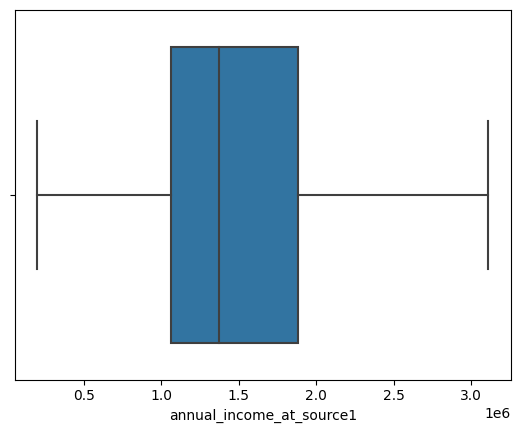

In [105]:
sns.boxplot(data=godigt,x='annual_income_at_source1');

There are outliers present in annual_income_at_source column so to treat it we have to use BOXPLOT.Finally after treating it , we got the results within the range.

ii) avg_spends_l3m :

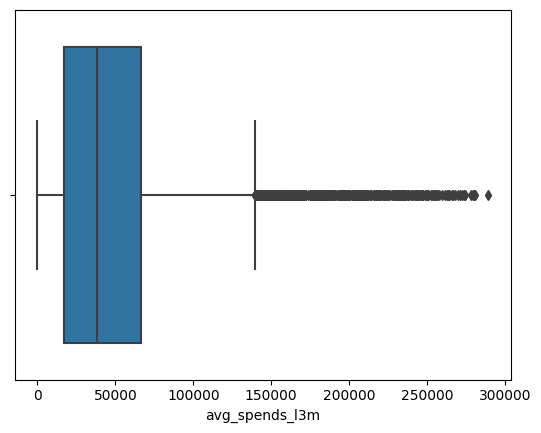

In [106]:
sns.boxplot(data=godigt,x='avg_spends_l3m');

In [107]:
def detect_outlier (col):
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range2=Q1-(1.5*IQR)
    upper_range2=Q3+(1.5*IQR)
    return lower_range2,upper_range2
lr2,ur2=detect_outlier(godigt['avg_spends_l3m'])
print('lower_range',lr2,'upper_range',ur2)

lower_range -56156.75 upper_range 139621.25


In [108]:
godigt['avg_spends_l3m1']=godigt['avg_spends_l3m']
godigt['avg_spends_l3m1']=np.where(godigt['avg_spends_l3m1']>ur2,ur2,godigt['avg_spends_l3m1'])
godigt['avg_spends_l3m1']=np.where(godigt['avg_spends_l3m1']<lr2,lr2,godigt['avg_spends_l3m1'])

In [109]:
godigt['avg_spends_l3m1'].describe()

count      8410.000000
mean      46900.397295
std       37472.085612
min          21.000000
25%       17260.000000
50%       38094.000000
75%       66204.500000
max      139621.250000
Name: avg_spends_l3m1, dtype: float64

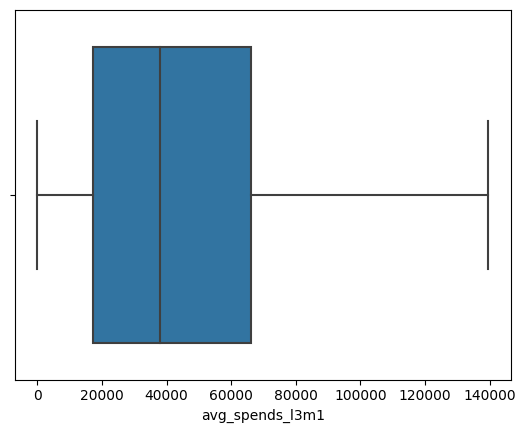

In [110]:
sns.boxplot(data=godigt,x='avg_spends_l3m1');



There are outliers present in avg_spends_l13m column .TO Treat it we have to use BOXPLOT. For that we are creating avg_spends_l131 as duplicate of avg_spends_l13m.Finally we got the result within the range.

<AxesSubplot: xlabel='cc_limit'>

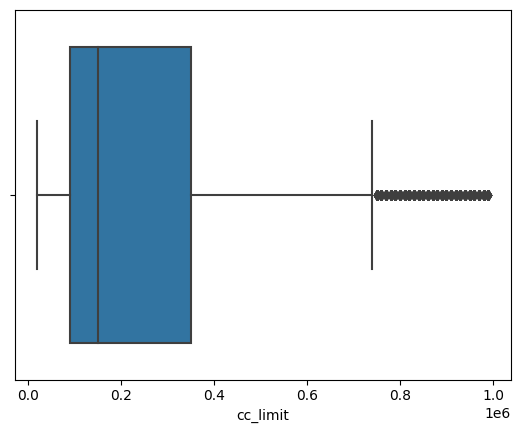

In [111]:
sns.boxplot(data=godigt,x='cc_limit')

# iv) TRANSFORMATION :

SKEWNESS :

In [112]:
print('skewness of annual_income_at_source is :',(godigt['annual_income_at_source']**0.1).skew())

skewness of annual_income_at_source is : -0.130564625977137


KURTOSIS :

In [113]:
print('kurtosis of annual_income_at_source is:',(godigt['annual_income_at_source']**0.1).kurtosis())

kurtosis of annual_income_at_source is: 0.4194707991779927


Here skewness & kurtosis are between -1 to +1 so we can able to say that they are normally distributed (symmetrical).

# FRAMING AN ANALYTICAL PROBLEM :

# 1) PEOPLE FROM  WHICH OCCUPATION HAVING CREDIT CARD THE MOST ?

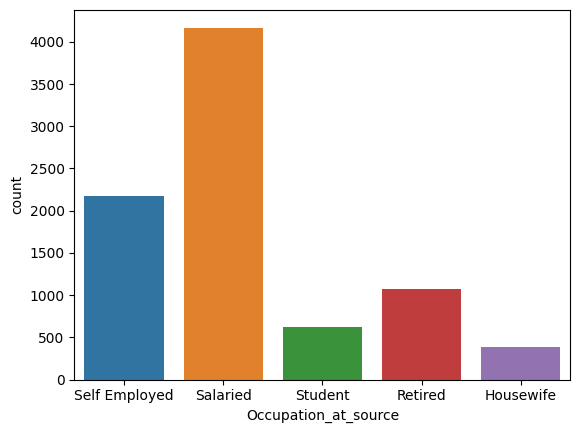

In [114]:
#Univariate Analysis :
sns.countplot(data=godigt,x='Occupation_at_source');

Maximum credit card holders are SALARIED persons (4168 out of 8410 ).

# 2) WHAT ARE THE TYPES OF CREDIT CARDS GIVEN BY GODIGT BANK AND  ITS COUNT ?

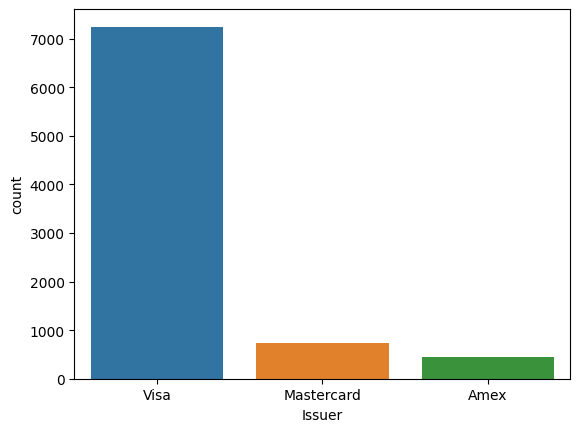

In [115]:
sns.countplot(data=godigt,x='Issuer');

In [116]:
godigt.groupby(['Issuer'])['card_type'].value_counts()

Issuer      card_type 
Amex        gold           144
            rewards         87
            smartearn       86
            centurion       62
            platinum        59
Mastercard  rewards        122
            prime          111
            pulse          101
            elite           96
            indianoil       65
            cashback        63
            shoprite        60
            aura            58
            smartearn       51
Visa        rewards       1284
            prosperity    1003
            edge           975
            chartered      916
            shoprite       626
            smartearn      623
            cashback       613
            indianoil      612
            aura           592
            prime            1
Name: card_type, dtype: int64

Maximum VISA type of credit cards issued by Godigt ( 7245 ).

# 3) HOW CREDIT CARDS DISTRIBUTED BASED ON OCCUPATION ?

In [117]:
godigt.groupby(['Occupation_at_source','Issuer'])['card_type'].value_counts()

Occupation_at_source  Issuer      card_type
Housewife             Amex        smartearn     8
                                  gold          6
                                  rewards       5
                                  centurion     1
                      Mastercard  rewards      11
                                               ..
Student               Visa        indianoil    43
                                  smartearn    41
                                  shoprite     38
                                  cashback     37
                                  prime         1
Name: card_type, Length: 108, dtype: int64

In [118]:
self_emp=godigt.loc[godigt['Occupation_at_source']=='Self Employed']
hw=godigt.loc[godigt['Occupation_at_source']=='Housewife']
student=godigt.loc[godigt['Occupation_at_source']=='Student']
retired=godigt.loc[godigt['Occupation_at_source']=='Retired']
salaried=godigt.loc[godigt['Occupation_at_source']=='Salaried']

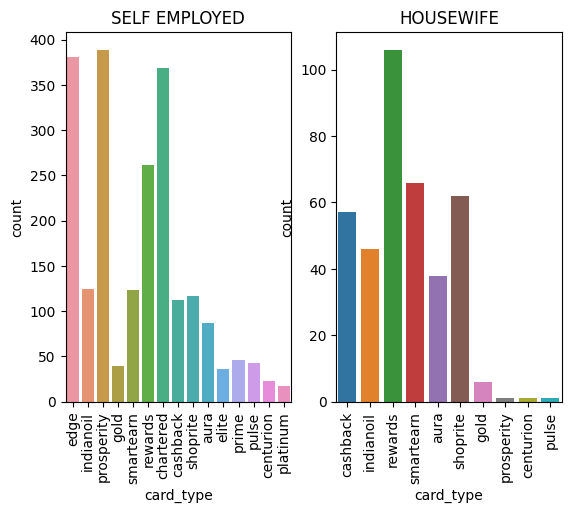

In [119]:
plt.subplot(1,2,1)
plt.xticks(rotation=90)
plt.title('SELF EMPLOYED')
sns.countplot(data=self_emp,x='card_type');

plt.subplot(1,2,2)
plt.xticks(rotation=90)
plt.title('HOUSEWIFE')
sns.countplot(data=hw,x='card_type');

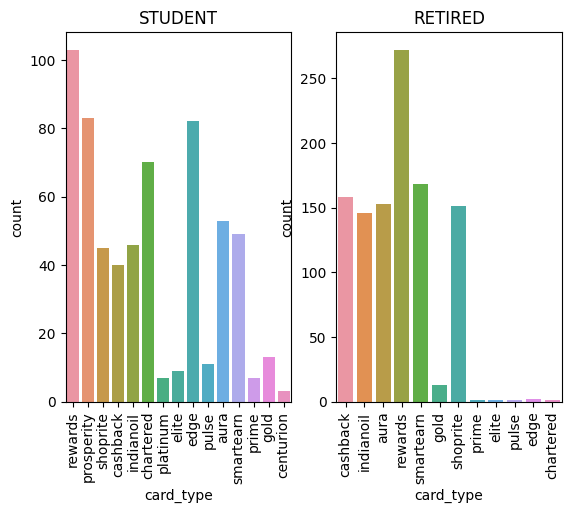

In [120]:
plt.subplot(1,2,1)
plt.xticks(rotation=90)
plt.title('STUDENT')
sns.countplot(data=student,x='card_type');

plt.subplot(1,2,2)
plt.xticks(rotation=90)
plt.title('RETIRED')
sns.countplot(data=retired,x='card_type');

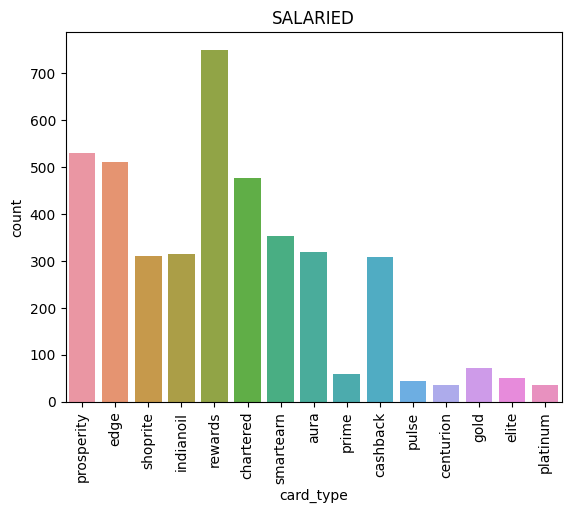

In [121]:
plt.xticks(rotation=90)
plt.title('SALARIED')
sns.countplot(data=salaried,x='card_type');


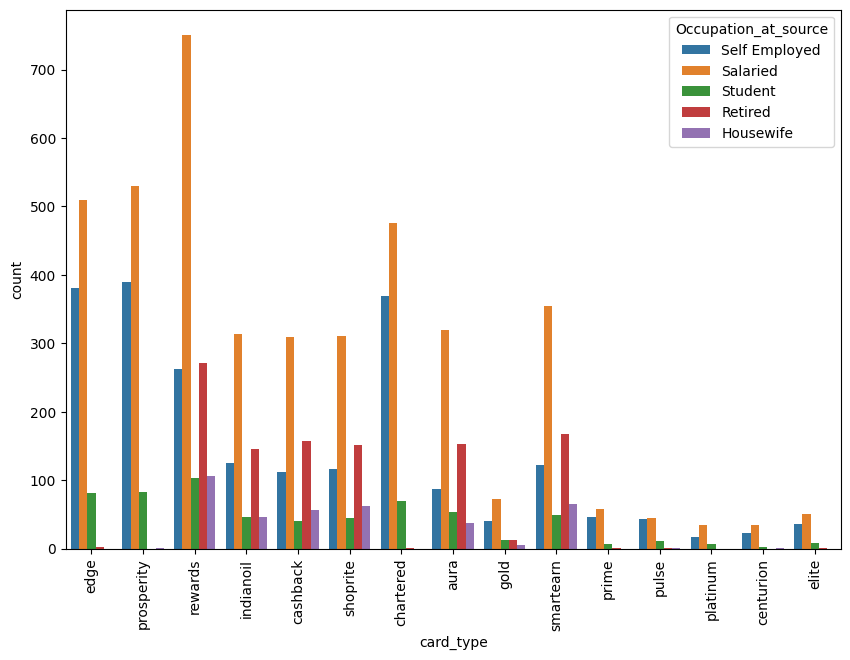

In [122]:
plt.figure(figsize=(10,7))
sns.countplot(data=godigt,x='card_type',hue='Occupation_at_source')
plt.xticks(rotation=90);

From the chart , we can say that 
    
                                 Salaried person , Student , Housewife , Retired person use Rewards card the most.
    
                                 Self employed person uses Prosperity card the most.
                                 
                                 

# 4) HOW MANY PERSONS HAVING OTHER BANK CREDIT CARDS ?

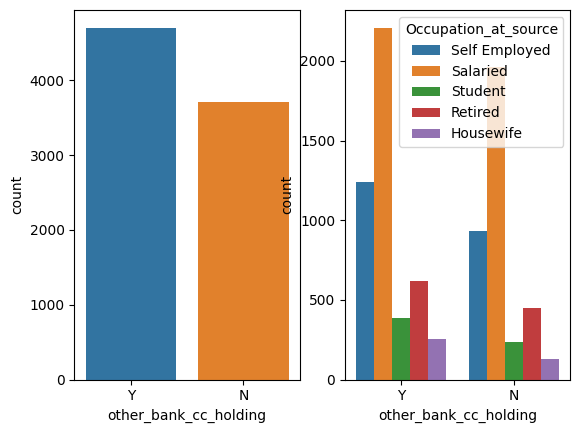

In [123]:
plt.subplot(1,2,1)
sns.countplot(data= godigt,x='other_bank_cc_holding');

plt.subplot(1,2,2)
sns.countplot(data= godigt,x='other_bank_cc_holding',hue='Occupation_at_source');

There are 4703 customers hoding other bank credit cards.Among them Salaried person holds the most.

# 5) WHAT IS THE ANNUAL INCOME  AND CREDIT CARD LIMIT OF PERSONS UNDER DIFFERENT OCCUPATION ?

i) HOUSEWIFE :

In [124]:
hw['annual_income_at_source1'].describe()

count    3.840000e+02
mean     9.935026e+05
std      3.618934e+05
min      2.012420e+05
25%      7.648158e+05
50%      1.064534e+06
75%      1.280119e+06
max      1.887145e+06
Name: annual_income_at_source1, dtype: float64

In [125]:
hw['cc_limit'].describe()

count       384.000000
mean      95104.166667
std       37206.495732
min       20000.000000
25%       70000.000000
50%      100000.000000
75%      130000.000000
max      150000.000000
Name: cc_limit, dtype: float64


    HOUSEWIFE - 384 HOUSEWIFE
                ANNUAL INCOME Ranges from Rs.2.012 lakhs to 18.87 lakhs
                CREDIT CARD LIMIT - Rs.20000 to 1.5 lakhs


ii) RETIRED :


In [126]:
retired['annual_income_at_source1'].describe()

count    1.067000e+03
mean     9.861879e+05
std      3.658172e+05
min      2.045580e+05
25%      6.865855e+05
50%      1.065313e+06
75%      1.294048e+06
max      1.972399e+06
Name: annual_income_at_source1, dtype: float64

In [127]:
retired['cc_limit'].describe()

count      1067.000000
mean      94058.106842
std       37628.184885
min       20000.000000
25%       70000.000000
50%      100000.000000
75%      130000.000000
max      150000.000000
Name: cc_limit, dtype: float64

 
         RETIRED - 1067 RETIRED PERSONS
                   ANNUAL INCOME Ranges from Rs.2.045 lakhs to 19.72 lakhs
                   CREDIT CARD LIMIT - Rs.20000 to 1.5 lakhs


iii) SALARIED :


In [128]:
salaried['annual_income_at_source1'].describe()

count    4.168000e+03
mean     1.602935e+06
std      8.155519e+05
min      2.000950e+05
25%      1.090580e+06
50%      1.389903e+06
75%      1.940477e+06
max      3.111294e+06
Name: annual_income_at_source1, dtype: float64

In [129]:
salaried['cc_limit'].describe()

count      4168.000000
mean     268145.393474
std      242956.730913
min       20000.000000
25%      100000.000000
50%      160000.000000
75%      380000.000000
max      990000.000000
Name: cc_limit, dtype: float64

        SALARIED - 4168 SALARIED PERSONS
                   ANNUAL INCOME Ranges from Rs. 2.00 lakhs to 31.11 lakhs
                   CREDIT CARD LIMIT - Rs.20000 to 9.9 lakhs

iv) SELF EMPLOYED :

In [130]:
self_emp['annual_income_at_source1'].describe()

count    2.170000e+03
mean     1.829448e+06
std      7.530434e+05
min      2.054690e+05
25%      1.321402e+06
50%      1.678320e+06
75%      2.230611e+06
max      3.111294e+06
Name: annual_income_at_source1, dtype: float64

In [131]:
self_emp['cc_limit'].describe()

count      2170.000000
mean     321889.400922
std      228066.676993
min       20000.000000
25%      160000.000000
50%      250000.000000
75%      430000.000000
max      990000.000000
Name: cc_limit, dtype: float64

            SELF EMPLOYED - 2170 SELF EMPLOYED PERSONS
                            ANNUAL INCOME Ranges from Rs. 2.05 lakhs to 31.11 lakhs
                            CREDIT CARD LIMIT - Rs.20000 to 9.9 lakhs

V) STUDENT :

In [132]:
student['annual_income_at_source1'].describe()

count    6.210000e+02
mean     1.593433e+06
std      7.834851e+05
min      2.025580e+05
25%      1.116910e+06
50%      1.397247e+06
75%      1.900064e+06
max      3.111294e+06
Name: annual_income_at_source1, dtype: float64

In [133]:
student['cc_limit'].describe()

count       621.000000
mean     262190.016103
std      229253.422172
min       20000.000000
25%      100000.000000
50%      170000.000000
75%      370000.000000
max      980000.000000
Name: cc_limit, dtype: float64

                STUDENT -   621 STUDENTS
                            ANNUAL INCOME Ranges from Rs. 2.025 lakhs to 31.11 lakhs
                            CREDIT CARD LIMIT - Rs.20000 to 9.8 lakhs

# 6) HOW LONG DIFFERENT CATEGORY PEOPLE USES CREDIT CARD (IN TERMS OF NUMBER OF MONTHS) ?

In [134]:
godigt['T+2_month_activity']=np.where(godigt['T+2_month_activity']==1,2,godigt['T+2_month_activity'])
godigt['T+3_month_activity']=np.where(godigt['T+3_month_activity']==1,3,godigt['T+3_month_activity'])
godigt['T+6_month_activity']=np.where(godigt['T+6_month_activity']==1,6,godigt['T+6_month_activity'])
godigt['T+12_month_activity']=np.where(godigt['T+12_month_activity']==1,12,godigt['T+12_month_activity'])

In [135]:
godigt['total_term_in_months']=godigt.iloc[:,18:23].sum(axis=1)
godigt['total_term_in_months']

0       27
1       52
2       24
3       52
4       22
        ..
8443    47
8444    52
8445    36
8446    55
8447    37
Name: total_term_in_months, Length: 8410, dtype: int64

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2688\279782379.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=godigt,y='total_term_in_months',x='Occupation_at_source',ci=False);


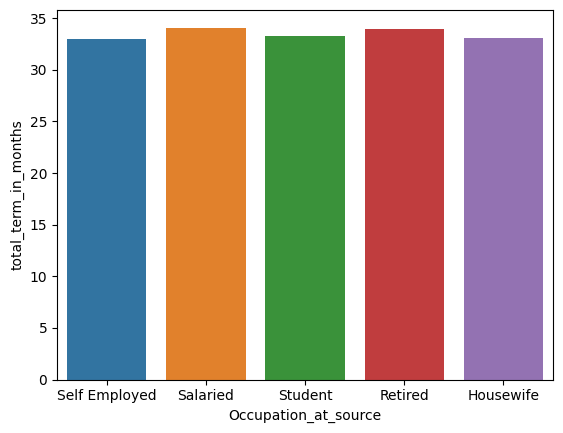

In [136]:
sns.barplot(data=godigt,y='total_term_in_months',x='Occupation_at_source',ci=False);

In [137]:
godigt.groupby(['Occupation_at_source'])['total_term_in_months'].mean()

Occupation_at_source
Housewife        33.049479
Retired          33.978444
Salaried         34.072697
Self Employed    32.935023
Student          33.275362
Name: total_term_in_months, dtype: float64

On an average , Salaried and Retired person uses credit card the most in terms of number of months.

# 7) WHAT IS THE AVERAGE SPENDING OF PEOPLE FOR LAST 3 MONTHS ? 

In [138]:
godigt.groupby(['Occupation_at_source'])['avg_spends_l3m1'].mean()

Occupation_at_source
Housewife        27425.973958
Retired          29164.032802
Salaried         49037.837932
Self Employed    54899.652304
Student          47118.824879
Name: avg_spends_l3m1, dtype: float64

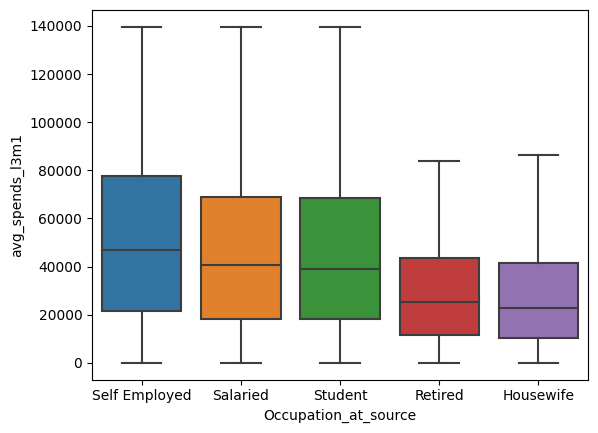

In [139]:
sns.boxplot(data=godigt,x='Occupation_at_source',y='avg_spends_l3m1');

On an average , the average spending for last 3 months was maximum among SELF EMPLOYED person.

# 8) HOW MANY CUSTOMER PAYS OFF THEIR BALANCE IN EVERY FULL MONTH ? 

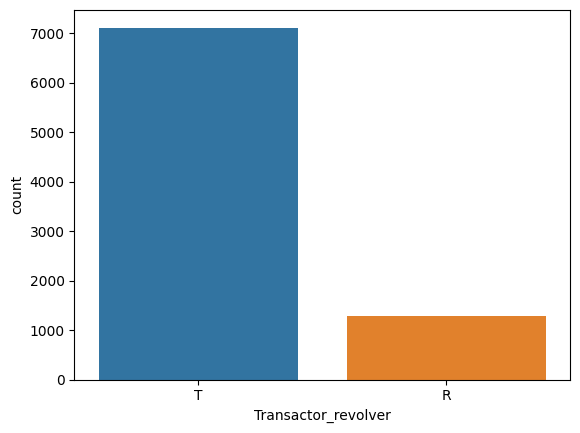

In [140]:
sns.countplot(data=godigt,x='Transactor_revolver');

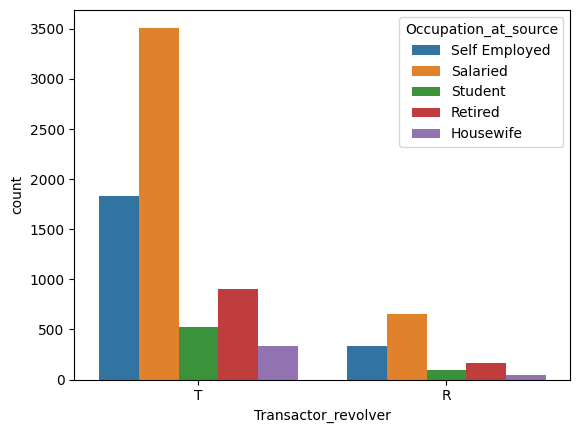

In [141]:
sns.countplot(data=godigt,x='Transactor_revolver',hue='Occupation_at_source');

            TOTAL TRANSACTOR - 7115
                HOUSEWIFE - 337
                RETIRED - 906
                SALARIED - 3512
                SELF EMPLOYED - 1833
                STUDENT - 527
                
              TOTAL REVOLVER - 1295
                HOUSEWIFE - 47
                RETIRED - 161
                SALARIED - 609
                SELF EMPLOYED - 337
                STUDENT - 94
            


In [142]:
hw['avg_spends_l3m1'].median()

22781.5

In [143]:
self_emp['avg_spends_l3m1'].median()

47086.5

In [144]:
retired['avg_spends_l3m1'].median()

25392.0

In [145]:
salaried['avg_spends_l3m1'].median()

40615.5

In [146]:
student['avg_spends_l3m1'].median()

38824.0

In [147]:
print("No. of customers with avg spending for last 3 months <= 22781 & Occupation_at_source is Housewife :",len(godigt.loc[(godigt['avg_spends_l3m1']<22781.5) & (godigt['Occupation_at_source']=='Housewife')]))
print("No. of customers with avg spending for last 3 months <= 47087 & Occupation_at_source is Self employed :",len(godigt.loc[(godigt['avg_spends_l3m1']<47086.5) & (godigt['Occupation_at_source']=='Self Employed')]))
print("No. of customers with avg spending for last 3 months <= 38824 & Occupation_at_source is Student :",len(godigt.loc[(godigt['avg_spends_l3m1']<38824) & (godigt['Occupation_at_source']=='Student')]))
print("No. of customers with avg spending for last 3 months <= 25392 & Occupation_at_source is Retired :",len(godigt.loc[(godigt['avg_spends_l3m1']<25392) & (godigt['Occupation_at_source']=='Retired')]))
print("No. of customers with avg spending for last 3 months <= 40616 & Occupation_at_source is Salaried :",len(godigt.loc[(godigt['avg_spends_l3m1']<40615.5) & (godigt['Occupation_at_source']=='Salaried')]))


No. of customers with avg spending for last 3 months <= 22781 & Occupation_at_source is Housewife : 192
No. of customers with avg spending for last 3 months <= 47087 & Occupation_at_source is Self employed : 1085
No. of customers with avg spending for last 3 months <= 38824 & Occupation_at_source is Student : 310
No. of customers with avg spending for last 3 months <= 25392 & Occupation_at_source is Retired : 533
No. of customers with avg spending for last 3 months <= 40616 & Occupation_at_source is Salaried : 2084


In [148]:
godigt['usage_percent']=godigt['avg_spends_l3m1']/godigt['cc_limit']*100

In [149]:
round(godigt['usage_percent'].median(),4)

21.2587

In [150]:
print('NO. OF CUSTOMERS WHO DIDNOT USED THEIR CREDIT CARDS EFFECTIVELY :',len(godigt.loc[godigt['usage_percent']<21.258].value_counts()))

NO. OF CUSTOMERS WHO DIDNOT USED THEIR CREDIT CARDS EFFECTIVELY : 4204
